# Trabajo con medida central
###1. Como analizar dataframes
###2. Overview de los datos
###3. obtener medidas centrales
###4. Analizar gráficas

In [3]:
!pip install statsmodels
!pip install wquantiles

##1. Analizando Dataframes

In [4]:
import pandas as pd
import numpy as np
from statsmodels import robust
import wquantiles
from scipy.stats import trim_mean
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
estado = pd.read_csv("/content/state.csv")

In [6]:
#Ver los primeros 5 registros
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
#Ver los ultimos 4 registros
estado.tail(4)

,State,Population,Murder.Rate,Abbreviation
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [8]:
#Ver muestreo de 10 registros
estado.sample(10)

,State,Population,Murder.Rate,Abbreviation
36,Oregon,3831074,2.0,OR
22,Minnesota,5303925,1.6,MN
4,California,37253956,4.4,CA
39,South Carolina,4625364,6.4,SC
2,Arizona,6392017,4.7,AZ
43,Utah,2763885,2.3,UT
10,Hawaii,1360301,1.8,HI
46,Washington,6724540,2.5,WA
30,New Mexico,2059179,4.8,NM
5,Colorado,5029196,2.8,CO


##2. Overview de Datos

In [9]:
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [10]:
list(estado.columns) #Convertir en listas nombres de columnas

['State', 'Population', 'Murder.Rate', 'Abbreviation']

In [11]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [12]:
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


###2.1 Estimando las tasas de población y asesinatos

In [13]:
estado["Population"].mean()

6162876.3

In [14]:
trim_mean(estado["Population"], 0.1)

4783697.125

In [15]:
#Media ponderada de asesinatos
np.average(estado["Murder.Rate"], weights=estado["Population"])

4.445833981123393

###3 Gráfica

<Axes: >

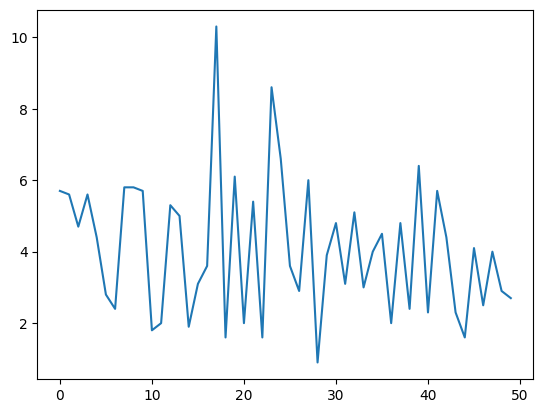

In [19]:
estado["Murder.Rate"].plot.line()

<Axes: >

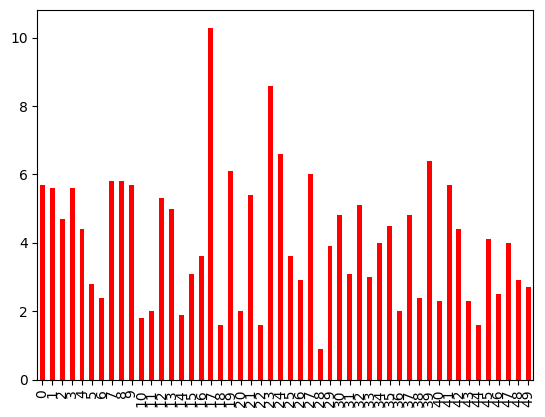

In [21]:
estado["Murder.Rate"].plot.bar(color="red")

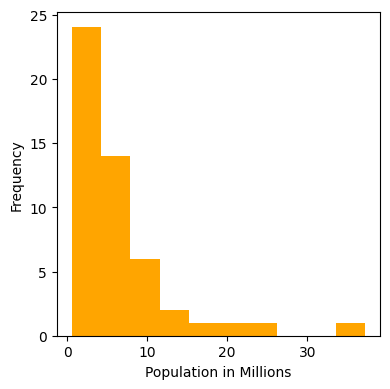

In [30]:
ax = (estado.Population/1_000_000).plot.hist(color="orange", figsize =(4,4))
ax.set_xlabel("Population in Millions")
plt.tight_layout()
plt.show()

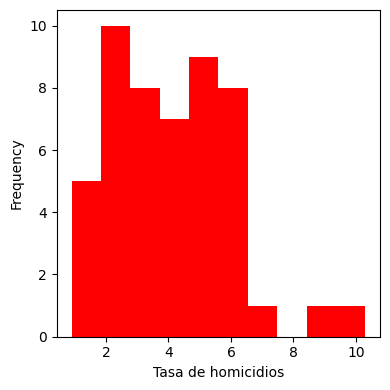

In [34]:
ax = (estado["Murder.Rate"]).plot.hist(color="red", figsize =(4,4))
ax.set_xlabel("Tasa de homicidios")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

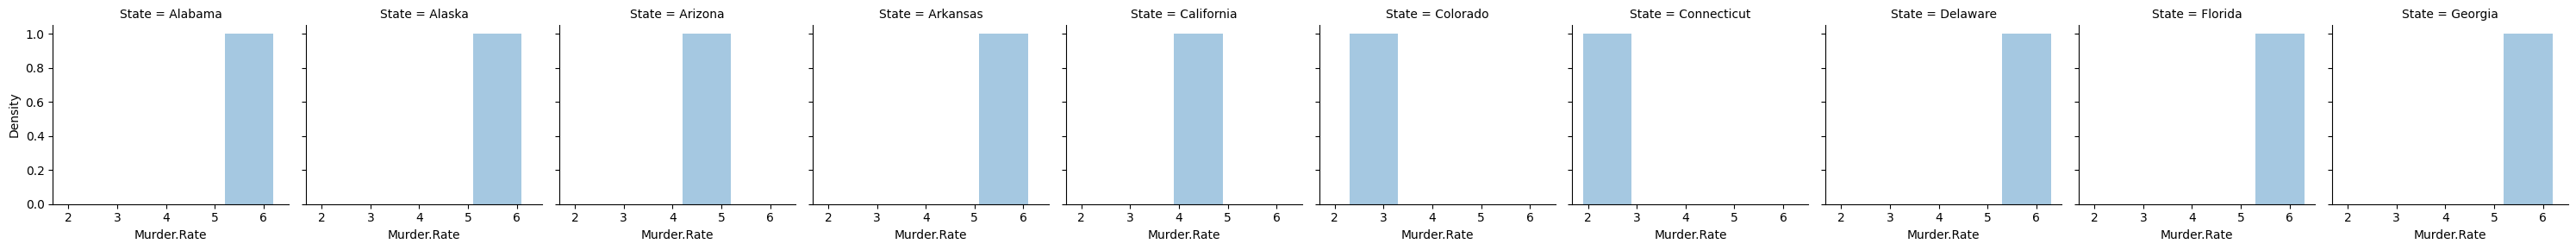

In [37]:
analisis = estado.head(10)
g = sns.FacetGrid(analisis,col="State")
g.map(sns.distplot,"Murder.Rate")